In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import cohen_kappa_score,make_scorer
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_log_error
#print('RMSLE:', sqrt(mean_squared_log_error(np.exp(y_cv), np.exp(y_pred2))))
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#X_train, X_test, y_train, y_test = train_test_split(X, label_encoded_y, test_size=test_size, random_state=seed)
#accuracy = accuracy_score(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.decomposition import PCA
from mlxtend.regressor import StackingCVRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from math import sqrt
from sklearn.svm import SVR,SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier,BaggingRegressor,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

In [2]:
train_x=pd.read_csv('train_values.csv',index_col='patient_id')
train_y=pd.read_csv('train_labels.csv',index_col='patient_id')
test_x=pd.read_csv('test_values.csv',index_col='patient_id')
submission=pd.read_csv('submission_format.csv')

In [3]:
submission.head()

,patient_id,heart_disease_present
0,olalu7,0.5
1,z9n6mx,0.5
2,5k4413,0.5
3,mrg7q5,0.5
4,uki4do,0.5


In [4]:
train_x.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
patient_id,,,,,,,,,,,,,
0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [5]:
train_x.shape

(180, 13)

In [6]:
l=len(train_x)
l

180

In [7]:
train_y.head()

,heart_disease_present
patient_id,
0z64un,0
ryoo3j,0
yt1s1x,1
l2xjde,1
oyt4ek,0


In [8]:
test_x.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
patient_id,,,,,,,,,,,,,
olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [9]:
test_x.shape

(90, 13)

In [10]:
train_x.isnull().sum()

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

In [11]:
train_y.isnull().sum()

heart_disease_present    0
dtype: int64

In [12]:
test_x.isnull().sum()

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

In [13]:
t=pd.concat((train_x,train_y),axis=1)

In [14]:
t.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
patient_id,,,,,,,,,,,,,,
0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


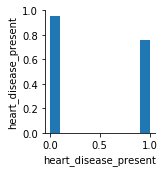

In [15]:
sns.pairplot(train_y)

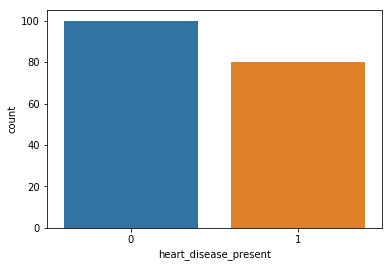

In [16]:
sns.countplot(train_y.heart_disease_present)

In [17]:
all=pd.concat((train_x,test_x),axis=0)

In [18]:
all.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
patient_id,,,,,,,,,,,,,
0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [19]:
print('slope_of_peak_exercise_st_segment',all['slope_of_peak_exercise_st_segment'].nunique())
print('thal',all['thal'].nunique())
print('resting_blood_pressure',all['resting_blood_pressure'].nunique())
print('chest_pain_type',all['chest_pain_type'].nunique())
print('num_major_vessels',all['num_major_vessels'].nunique())
print('fasting_blood_sugar_gt_120_mg_per_dl',all['fasting_blood_sugar_gt_120_mg_per_dl'].nunique())
print('resting_ekg_results',all['resting_ekg_results'].nunique())
print('serum_cholesterol_mg_per_dl',all['serum_cholesterol_mg_per_dl'].nunique())
print('oldpeak_eq_st_depression',all['oldpeak_eq_st_depression'].nunique())
print('sex',all['sex'].nunique())
print('age',all['age'].nunique())
print('max_heart_rate_achieved',all['max_heart_rate_achieved'].nunique())
print('exercise_induced_angina',all['exercise_induced_angina'].nunique())
          

slope_of_peak_exercise_st_segment 3
thal 3
resting_blood_pressure 47
chest_pain_type 4
num_major_vessels 4
fasting_blood_sugar_gt_120_mg_per_dl 2
resting_ekg_results 3
serum_cholesterol_mg_per_dl 144
oldpeak_eq_st_depression 39
sex 2
age 41
max_heart_rate_achieved 90
exercise_induced_angina 2


In [20]:
c=train_y.heart_disease_present.value_counts()

In [21]:
selected_features = ['age','sex','max_heart_rate_achieved','resting_blood_pressure']
train_values = train_x[selected_features]

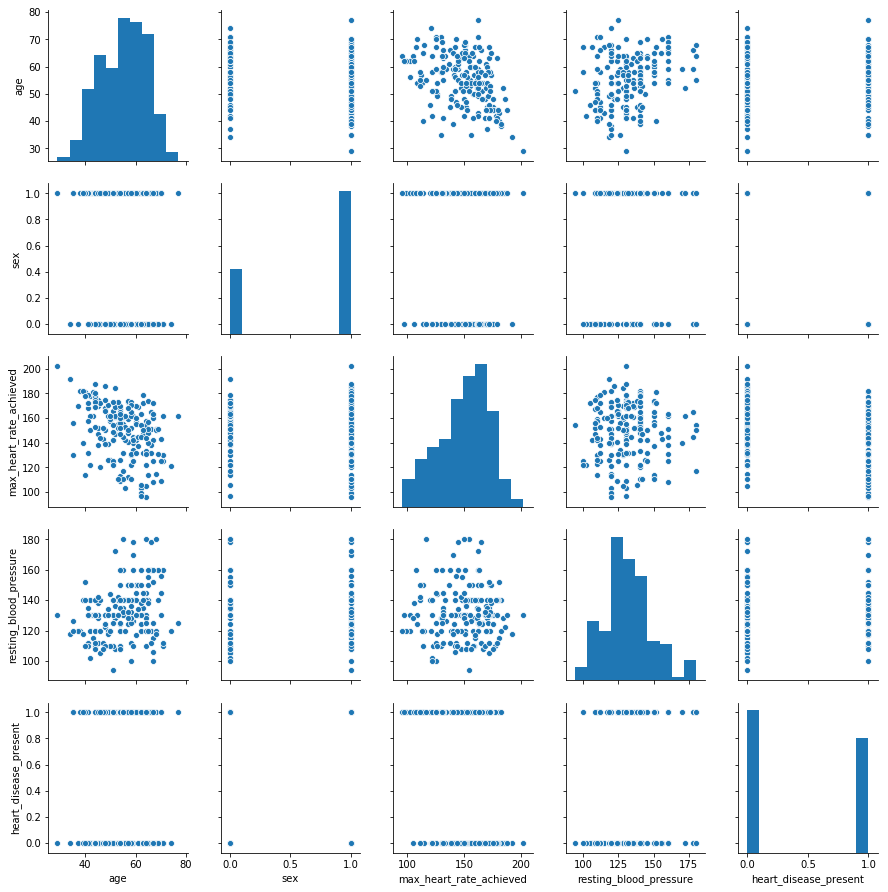

In [22]:
sns.pairplot(train_values.join(train_y))

In [23]:
all['slope_of_peak_exercise_st_segment']=all['slope_of_peak_exercise_st_segment'].astype('category')
all['chest_pain_type']=all['chest_pain_type'].astype('category')
all['num_major_vessels']=all['num_major_vessels'].astype('category')
all['fasting_blood_sugar_gt_120_mg_per_dl']=all['fasting_blood_sugar_gt_120_mg_per_dl'].astype('category')
all['resting_ekg_results']=all['resting_ekg_results'].astype('category')
all['sex']=all['sex'].astype('category')
all['exercise_induced_angina']=all['exercise_induced_angina'].astype('category')
all['oldpeak_eq_st_depression']=all['oldpeak_eq_st_depression'].astype('int')

In [24]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 0z64un to aeiv0y
Data columns (total 13 columns):
slope_of_peak_exercise_st_segment       270 non-null category
thal                                    270 non-null object
resting_blood_pressure                  270 non-null int64
chest_pain_type                         270 non-null category
num_major_vessels                       270 non-null category
fasting_blood_sugar_gt_120_mg_per_dl    270 non-null category
resting_ekg_results                     270 non-null category
serum_cholesterol_mg_per_dl             270 non-null int64
oldpeak_eq_st_depression                270 non-null int32
sex                                     270 non-null category
age                                     270 non-null int64
max_heart_rate_achieved                 270 non-null int64
exercise_induced_angina                 270 non-null category
dtypes: category(7), int32(1), int64(4), object(1)
memory usage: 16.4+ KB


In [25]:
a=all.drop(['resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','age','max_heart_rate_achieved'],axis=1)

In [26]:
a.head()

,slope_of_peak_exercise_st_segment,thal,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,sex,exercise_induced_angina
patient_id,,,,,,,,
0z64un,1,normal,2,0,0,2,1,0
ryoo3j,2,normal,3,0,0,0,0,0
yt1s1x,1,normal,4,3,0,2,1,1
l2xjde,1,reversible_defect,4,0,0,0,1,0
oyt4ek,3,reversible_defect,1,0,0,2,1,0


In [27]:
A=pd.get_dummies(a)

In [28]:
A=pd.DataFrame(A)

In [29]:
A.shape

(270, 23)

In [30]:
A.head()

,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3,thal_fixed_defect,thal_normal,thal_reversible_defect,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,...,num_major_vessels_3,fasting_blood_sugar_gt_120_mg_per_dl_0,fasting_blood_sugar_gt_120_mg_per_dl_1,resting_ekg_results_0,resting_ekg_results_1,resting_ekg_results_2,sex_0,sex_1,exercise_induced_angina_0,exercise_induced_angina_1
patient_id,,,,,,,,,,,,,,,,,,,,,
0z64un,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
ryoo3j,0,1,0,0,1,0,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
yt1s1x,1,0,0,0,1,0,0,0,0,1,...,1,1,0,0,0,1,0,1,0,1
l2xjde,1,0,0,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0,1,1,0
oyt4ek,0,0,1,0,0,1,1,0,0,0,...,0,1,0,0,0,1,0,1,1,0


In [31]:
T=pd.concat((A,all[['resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','age','max_heart_rate_achieved']]),axis=1)

In [32]:
T.shape

(270, 28)

In [33]:
Train=T.iloc[:l,]

In [34]:
Train.shape

(180, 28)

In [35]:
Test=T.iloc[l:,]

In [36]:
Test.shape

(90, 28)

In [37]:
Test.head()

,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3,thal_fixed_defect,thal_normal,thal_reversible_defect,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,...,resting_ekg_results_2,sex_0,sex_1,exercise_induced_angina_0,exercise_induced_angina_1,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved
patient_id,,,,,,,,,,,,,,,,,,,,,
olalu7,0,1,0,0,0,1,1,0,0,0,...,1,0,1,1,0,170,288,0,59,159
z9n6mx,1,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,138,183,1,35,182
5k4413,0,1,0,0,0,1,0,0,0,1,...,1,0,1,0,1,120,177,2,43,120
mrg7q5,1,0,0,0,1,0,0,0,1,0,...,0,1,0,1,0,102,318,0,60,160
uki4do,0,1,0,0,1,0,0,0,0,1,...,1,0,1,0,1,138,166,3,61,125


In [38]:
Train.head()

,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3,thal_fixed_defect,thal_normal,thal_reversible_defect,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,...,resting_ekg_results_2,sex_0,sex_1,exercise_induced_angina_0,exercise_induced_angina_1,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved
patient_id,,,,,,,,,,,,,,,,,,,,,
0z64un,1,0,0,0,1,0,0,1,0,0,...,1,0,1,1,0,128,308,0,45,170
ryoo3j,0,1,0,0,1,0,0,0,1,0,...,0,1,0,1,0,110,214,1,54,158
yt1s1x,1,0,0,0,1,0,0,0,0,1,...,1,0,1,0,1,125,304,0,77,162
l2xjde,1,0,0,0,0,1,0,0,0,1,...,0,0,1,1,0,152,223,0,40,181
oyt4ek,0,0,1,0,0,1,1,0,0,0,...,1,0,1,1,0,178,270,4,59,145


In [39]:
train_y.shape

(180, 1)

In [40]:
s=StandardScaler()
Train=s.fit_transform(Train)
Test=s.transform(Test)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(Train,train_y)

In [42]:
X1=Train
y1=train_y

In [43]:
# tree

In [44]:
tree=DecisionTreeClassifier()

In [45]:
para_tree={'criterion':['gini','entropy'],'max_depth':[3,5,7,9]}

In [46]:
best_tree=GridSearchCV(estimator=tree,param_grid=para_tree,scoring='roc_auc',n_jobs=-1)

In [47]:
best_tree.fit(X=X1,y=y1)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [48]:
best_tree.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [49]:
cross_val_score(estimator=best_tree.best_estimator_,X=X1,y=y1,cv=5,scoring='roc_auc',n_jobs=-1).mean()

0.7509375

In [50]:
# Bagging classifier

In [51]:
bag=BaggingClassifier(base_estimator=best_tree.best_estimator_)

In [52]:
bagging_param={'n_estimators':[100,200,250,300],'max_samples' : [0.05, 0.1, 0.2, 0.5,1],'max_features':[3,5,7,9]}

In [53]:
best_bag_tree=GridSearchCV(estimator=bag,param_grid=bagging_param,scoring='roc_auc',cv=5,n_jobs=-1)

In [54]:
best_bag_tree.fit(X=X1,y=y1)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            ...stimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 250, 300], 'max_samples': [0.05, 0.1, 0.2, 0.5, 1], 'max_features': [3, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [55]:
best_bag_tree.best_estimator_

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=3,
         max_samples=0.5, n_estimators=200, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [56]:
cross_val_score(estimator=best_bag_tree.best_estimator_,X=X1,y=y1,cv=5,scoring='roc_auc',n_jobs=-1).mean()

0.9

In [57]:
# Random Forest Classifier

In [58]:
rf=RandomForestClassifier()

In [59]:
rf_param={'n_estimators':[50,100,150,200,250,300,350],'max_features':[3,5,7,9],'max_depth':[2,4,6,9]}

In [60]:
best_random_tree=GridSearchCV(estimator=rf,param_grid=rf_param,scoring='roc_auc',cv=5,n_jobs=-1)

In [61]:
best_random_tree.fit(X=X1,y=y1)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 150, 200, 250, 300, 350], 'max_features': [3, 5, 7, 9], 'max_depth': [2, 4, 6, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [62]:
best_random_tree.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
cross_val_score(estimator=best_random_tree.best_estimator_,X=X1,y=y1,cv=5,scoring='roc_auc',n_jobs=-1).mean()

0.8931249999999998

In [64]:
#Gradient boosting classifier

In [65]:
gb=GradientBoostingClassifier()

In [66]:
gb_param={'n_estimators':[50,100,150,200],'learning_rate':[0.1,0.01,0.001],'max_depth':[2,4,6,9]}

In [67]:
best_gb=GridSearchCV(estimator=gb,param_grid=gb_param,scoring='roc_auc',cv=5,n_jobs=-1)

In [68]:
best_gb.fit(X=X1,y=y1)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 150, 200], 'learning_rate': [0.1, 0.01, 0.001], 'max_depth': [2, 4, 6, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [69]:
best_gb.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [70]:
cross_val_score(estimator=best_gb.best_estimator_,X=X1,y=y1,cv=5,scoring='roc_auc',n_jobs=-1).mean()

0.8643749999999999

In [71]:
#XG boost classifier

In [72]:
xg=XGBClassifier()

In [73]:
xg_param={'n_estimators':[50,100,150,200],'learning_rate':[0.1,0.01,0.001],'max_depth':[2,6,9,12]}

In [74]:
best_xg=GridSearchCV(estimator=xg,param_grid=xg_param,scoring='roc_auc',cv=5,n_jobs=-1)

In [75]:
best_xg.fit(X=X1,y=y1)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 150, 200], 'learning_rate': [0.1, 0.01, 0.001], 'max_depth': [2, 6, 9, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [76]:
best_xg.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [77]:
cross_val_score(estimator=best_xg.best_estimator_,X=X1,y=y1,cv=5,scoring='roc_auc',n_jobs=-1).mean()

0.87375

In [78]:
lg=LogisticRegression()

In [79]:
lg_param={'penalty' : ['l1', 'l2'],'C': np.logspace(-4, 4, 20),'solver' : ['liblinear']}

In [80]:
best_lg=GridSearchCV(estimator=lg,param_grid=lg_param,scoring='roc_auc',cv=5,n_jobs=-1)

In [81]:
best_lg.fit(X=X1,y=y1)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [82]:
best_lg.best_estimator_

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [83]:
cross_val_score(estimator=best_lg.best_estimator_,X=X1,y=y1,cv=5,scoring='roc_auc',n_jobs=-1).mean()

0.9018750000000001

In [84]:
#p=best_lg.predict_proba(Test)[:, 1]

In [85]:
pipe = Pipeline(steps=[('logistic', LogisticRegression())])
pipe

Pipeline(memory=None,
     steps=[('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [86]:
param_grid = {'logistic__C': [0.0001, 0.001, 0.01, 1, 10], 
              'logistic__penalty': ['l1', 'l2']}
gs = GridSearchCV(estimator=pipe, 
                  param_grid=param_grid, 
                  cv=5)

In [87]:
gs.fit(X1,y1)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'logistic__C': [0.0001, 0.001, 0.01, 1, 10], 'logistic__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [88]:
gs.best_params_

{'logistic__C': 1, 'logistic__penalty': 'l2'}

In [89]:
cross_val_score(estimator=gs.best_estimator_,X=X1,y=y1,cv=5,scoring='roc_auc',n_jobs=-1).mean()

0.8825000000000001

In [96]:
y_pred=gs.predict(X1)

In [106]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [98]:
confusion_matrix(y1, y_pred)

array([[93,  7],
       [16, 64]], dtype=int64)

In [100]:
precision_score(y1, y_pred)

0.9014084507042254

In [101]:
recall_score(y1, y_pred)

0.8

In [103]:
f1_score(y1, y_pred)

0.8476821192052981

In [107]:
roc_auc_score(y1, y_pred)

0.865

In [108]:
fpr, tpr, thresholds = roc_curve(y1, y_pred)

In [109]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')

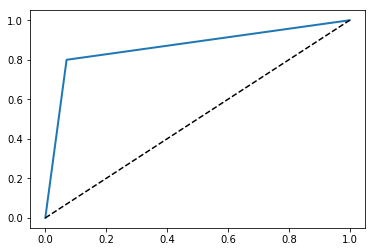

In [110]:
plot_roc_curve(fpr, tpr)
plt.show()

In [90]:
p=gs.predict_proba(Test)[:, 1]

In [54]:
p=pd.DataFrame(p)

In [55]:
p.head()

,0
0,0.501700
1,0.490980
2,0.510417
3,0.490964
4,0.509738


In [56]:
p.shape

(90, 1)

In [57]:
p=p.astype('float64')

In [58]:
submission['heart_disease_present']=p

In [59]:
submission.head()

,patient_id,heart_disease_present
0,olalu7,0.501700
1,z9n6mx,0.490980
2,5k4413,0.510417
3,mrg7q5,0.490964
4,uki4do,0.509738


In [60]:
submission.to_csv("d:/s/h1.csv",index=False)

In [61]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
patient_id               90 non-null object
heart_disease_present    90 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB
